In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

#### Experimenting graph plotting with COVID-19 data from John Hopkins University.

In [8]:
# Get data from repo, squash table into country-only data. The raw table 
# offers subdivisions (province, state, county level data) for some countries.

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df = df.drop(columns=["Province/State", "Lat", "Long"])
df = df.groupby("Country/Region").sum()
df = df.rename(columns=lambda x: datetime.strptime(x, "%m/%d/%y").strftime("%d%b%Y"))
df.head()

# df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").drop(columns=["Province/State", "Lat", "Long"]).groupby("Country/Region").sum().sort_values(by=df.columns[-1], ascending=False)

,22Jan2020,23Jan2020,24Jan2020,25Jan2020,26Jan2020,27Jan2020,28Jan2020,29Jan2020,30Jan2020,31Jan2020,...,14Mar2020,15Mar2020,16Mar2020,17Mar2020,18Mar2020,19Mar2020,20Mar2020,21Mar2020,22Mar2020,23Mar2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
Albania,0,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0


##### Create plot for a given country. In this case we'll choose Italy.

59138


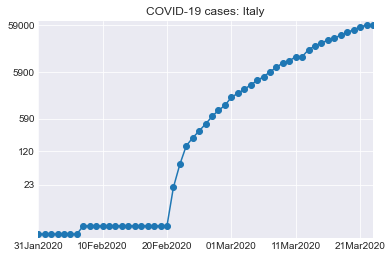

In [9]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

country = "Italy"


plt.style.use('seaborn-darkgrid') # This is a nice theme to use.
a = df.loc[country, :].replace(0, np.nan).dropna()
mx = max(map(int,list(a)))

# fig = plt.figure()

ax = plt.gca()
ax.set_yscale("log") # Use logarithmic scale for clarity
formatter = mdates.DateFormatter("%d%b%Y")
ax.xaxis.set_major_formatter(formatter)

a.plot(marker="o", ax=ax)

plt.yticks([mx, mx//10, mx//100, mx//500, mx//2500], [int(round(mx, len(str(mx))*-1+2)), int(round(mx//10,  len(str(mx//10))*-1+2)), int(round(mx//100, len(str(mx//100))*-1+2)), int(round(mx//500,  len(str(mx//500))*-1+2)), int(round(mx//2500,  len(str(mx//2500))*-1+2))])
plt.margins(0.02)
plt.title(f"COVID-19 cases: {country}")
plt.savefig("/tmp/plot.png", bbox_inches="tight")
print(mx)
